In [45]:
import pandas as pd
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [46]:
#not included
#data.info()

In [47]:
#not inclided
#data.isnull().sum()

In [48]:
data = pd.get_dummies(data, columns = ['Sex','ChestPainType' ,'RestingECG', 'ExerciseAngina', 'ST_Slope'])
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [61]:
fc = data.pop('HeartDisease')
data.insert(len(list(data)), 'HeartDisease', fc)
#data

In [62]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values
#data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree

#NOT TO BE INCLUDED
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

### 1. Gini

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [66]:
Y_pred = clf.predict(X_test)

#Accuracy Measure
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

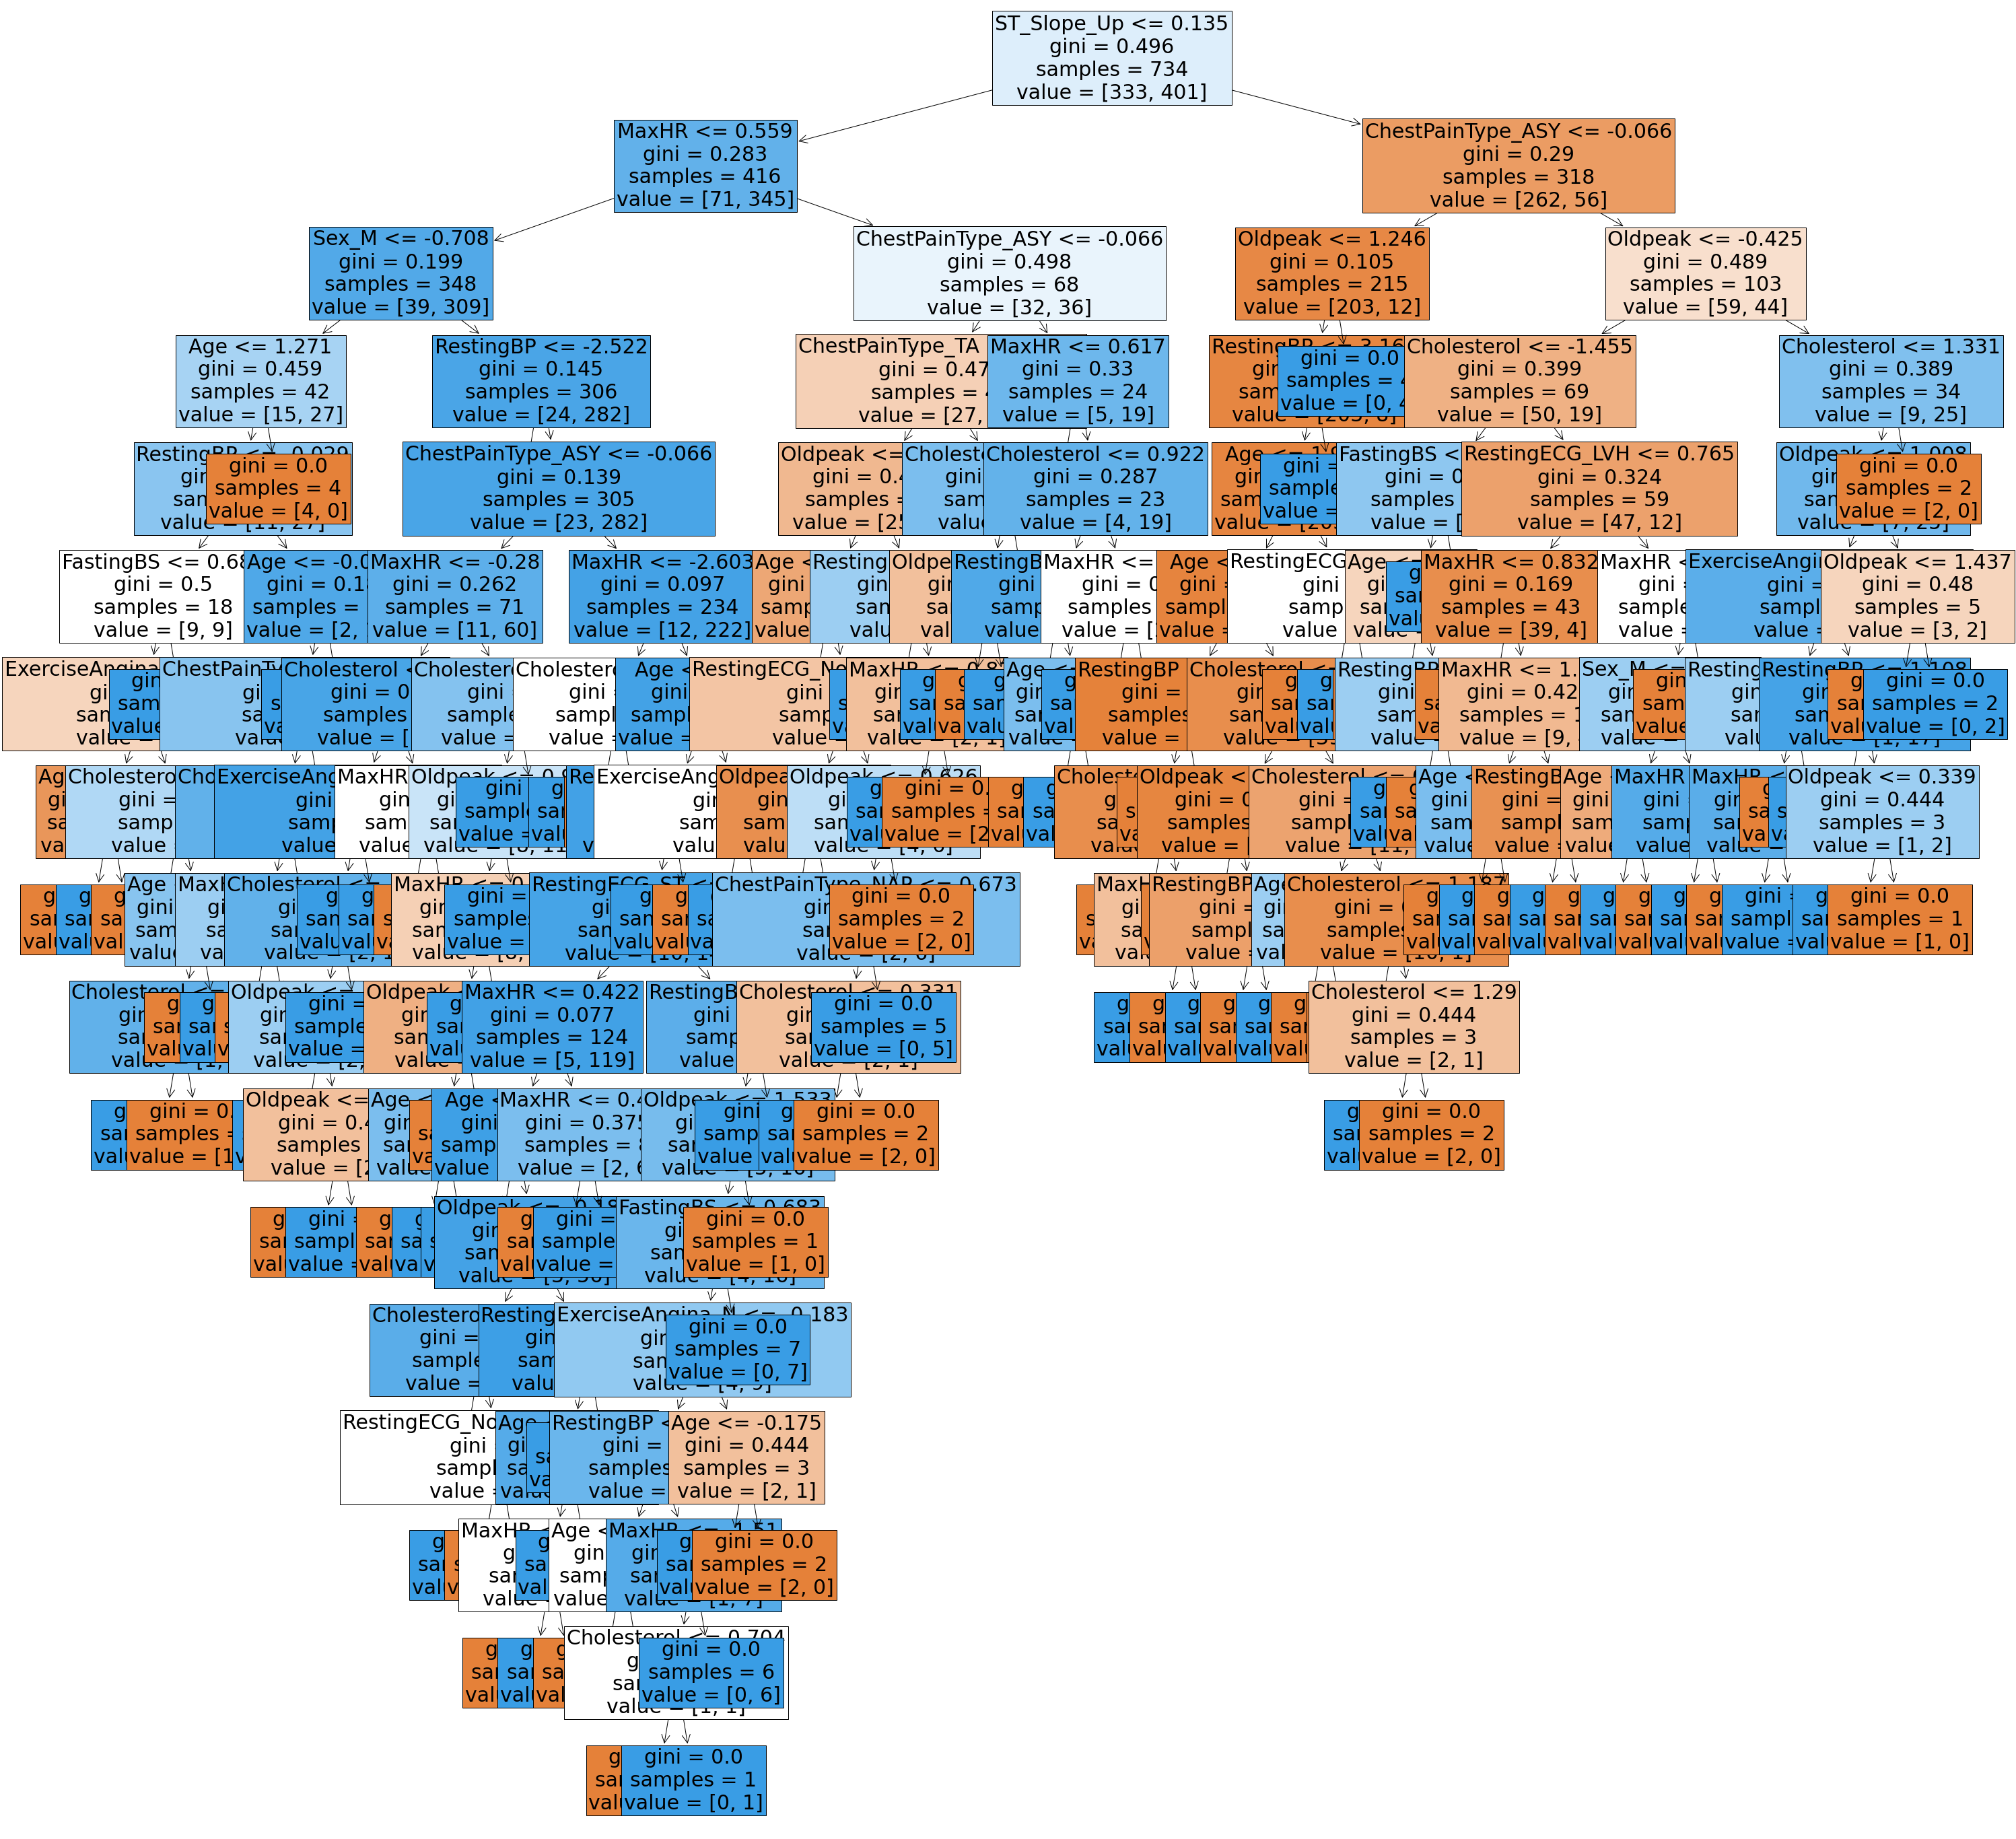

In [69]:
# from sklearn import tree
# tree.plot_tree(clf)
from matplotlib import pyplot as plt 
from sklearn import tree
fig = plt.figure(figsize=(50,50))
tree.plot_tree(clf, 
                   feature_names=data.columns,
                   fontsize= 30,
                   filled=True)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc = accuracy_score(Y_pred, Y_test)
print('Accuracy score  = %0.2f' %(acc*100))

prec = precision_score(Y_pred, Y_test)
print('Precision score  = %0.2f' % (prec*100))

recall = recall_score(Y_pred, Y_test)
print('Recall score = %0.2f' % (recall*100))

f1 = f1_score(Y_pred, Y_test)
print('f1 score  = %0.2f' % (f1*100))

Accuracy score  = 73.91
Precision score  = 68.22
Recall score = 83.91
f1 score  = 75.26


### 2. Entropy

from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='entropy', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
Y_pred = clf.predict(X_test)

#Accuracy Measure
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

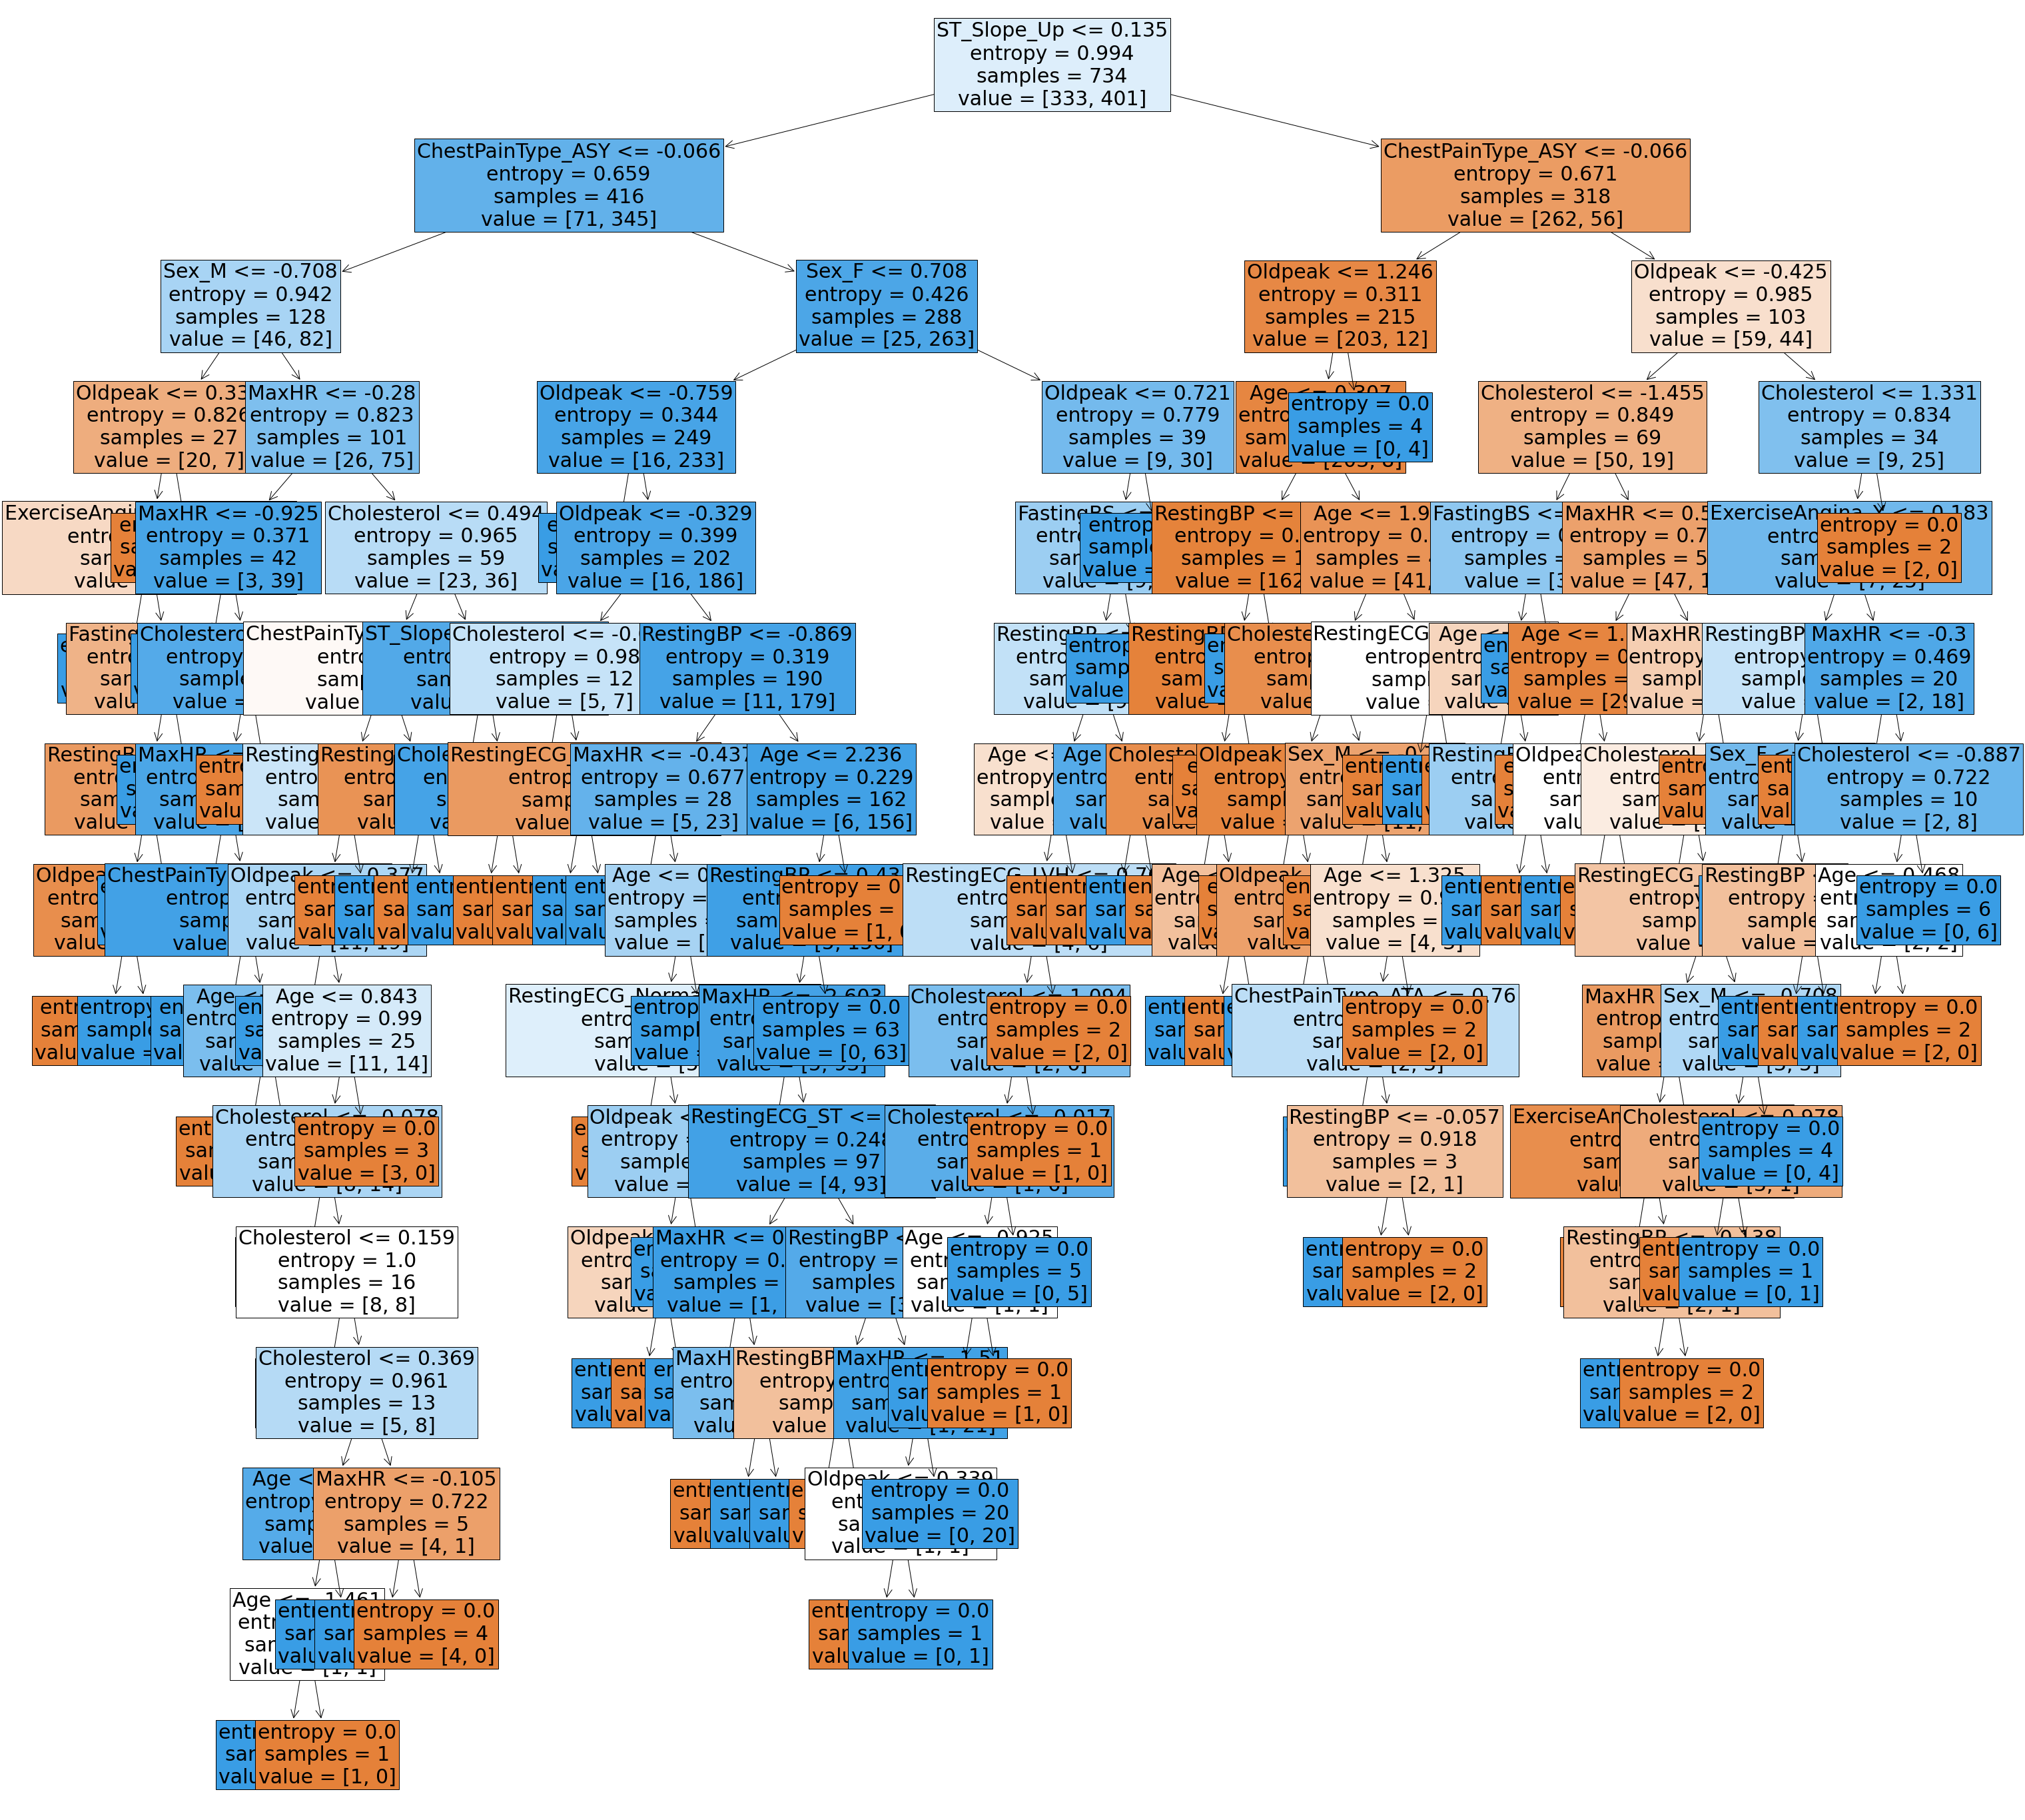

In [59]:
# from sklearn import tree
# tree.plot_tree(clf)
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(50,50))
tree.plot_tree(clf, 
                   feature_names=data.columns,
                   fontsize=30,
                   filled=True)
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc = accuracy_score(Y_pred, Y_test)
print('Accuracy score  = %0.2f' %(acc*100))

prec = precision_score(Y_pred, Y_test)
print('Precision score  = %0.2f' % (prec*100))

recall = recall_score(Y_pred, Y_test)
print('Recall score = %0.2f' % (recall*100))

f1 = f1_score(Y_pred, Y_test)
print('f1 score  = %0.2f' % (f1*100))

Accuracy score  = 78.80
Precision score  = 74.77
Recall score = 86.96
f1 score  = 80.40
